In [1]:
# Dependencies
import pandas as pd
import numpy as np
import warnings
from numpy import savetxt
warnings.simplefilter('ignore')

In [2]:
# Load csv file into dataframe
train = pd.read_csv("Resources/train.csv")
test = pd.read_csv("Resources/test.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train['Cabin'] = train['Cabin'].str.replace('[^0-9]','')
test['Cabin'] = test.Cabin.str.replace('[^0-9]','')
test.shape

(4277, 13)

In [5]:
# Find the structure of data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Find aggregate values of dataset
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
# Find unique values of non-numeric columns
print(train.Destination.unique())
print(len(train.Cabin.unique()))
print(train.HomePlanet.unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
1818
['Europa' 'Earth' 'Mars' nan]


In [8]:
# Find number of null values in the train data set
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Find number of null values in the test data set
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
# Remove null values with 0, median value and 'False'
age_median = train.Age.median()
train.Age.fillna(age_median, inplace = True)
train.fillna(0, inplace = True)

In [11]:
test_age_median = test.Age.median()
test.Age.fillna(test_age_median, inplace = True)
test.fillna(0, inplace = True)

In [12]:
# Remove columns Name, PassengerID which is not relevent 
train_df = train.drop(columns = ['Name','PassengerId'])
test_df = test.drop(columns = ['Name','PassengerId'])

In [13]:
# Fill boolean values with 1, 0 in train_df features
train_df.CryoSleep.replace({True:1,False:0}, inplace = True)
train_df.VIP.replace({True:1,False:0}, inplace = True)
train_df.Transported.replace({True:1,False:0}, inplace = True)

# Replace categorical destination values with 0 1 2 3
train_df.Destination.replace({'TRAPPIST-1e':3, 'PSO J318.5-22':2, 
                              '55 Cancri e':1,None:0}, inplace = True)

# Replace categorical Home planet values with 0 1 2 3
train_df.HomePlanet.replace({'Europa':1,'Earth':2,'Mars':3,
                             None:0}, inplace = True)


train_df['Transported']=train_df["Transported"].astype("int")
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,2,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,2,0,1,3,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [14]:
# Fill boolean values with 1, 0 in train_df features
test_df.CryoSleep.replace({True:1,False:0}, inplace = True)
test_df.VIP.replace({True:1,False:0}, inplace = True)

# Replace categorical destination values with 0 1 2 3
test_df.Destination.replace({'TRAPPIST-1e':3, 'PSO J318.5-22':2, 
                              '55 Cancri e':1,None:0}, inplace = True)

# Replace categorical Home planet values with 0 1 2 3
test_df.HomePlanet.replace({'Europa':1,'Earth':2,'Mars':3,
                             None:0}, inplace = True)
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,1,3,3,27.0,0,0.0,0.0,0.0,0.0,0.0
1,2,0,4,3,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,3,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,2,0,5,3,20.0,0,10.0,0.0,635.0,0.0,0.0


<AxesSubplot:>

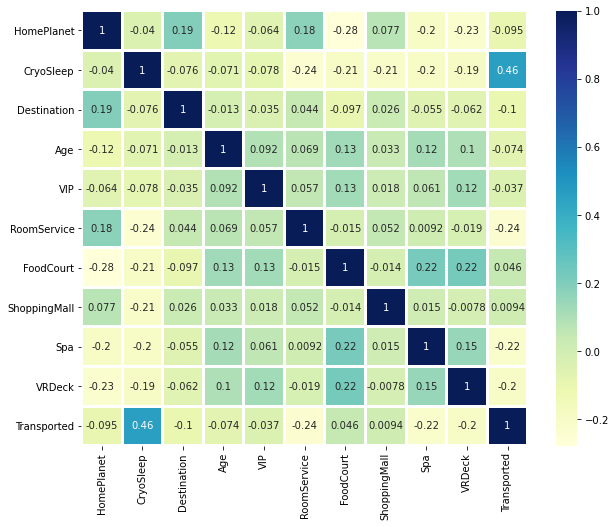

In [15]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation matrix graph
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot = True, 
            linewidth = 2, cmap="YlGnBu")

In [16]:
# Seperate dependent variables and independent variable
y = train_df.loc[:, train_df.columns == 'Transported']
X = train_df.loc[:, train_df.columns !='Transported']
print(X.shape)
print(test_df.shape)

(8693, 11)
(4277, 11)


In [17]:
# Split X and y using train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=30)

# Get shape of train test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (6085, 11)
train size y :  (6085, 1)
test size X :  (2608, 11)
test size y :  (2608, 1)


In [18]:
# Check the distribution of labels
y_train.value_counts(normalize = True)

Transported
0              0.500904
1              0.499096
dtype: float64

## Applying Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
 
ss = StandardScaler()

# Fit and transform the data
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

## Logistic Regression Model

In [43]:
# Scaled Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', solver='saga')
lr.fit(X_train_scaled, y_train)

# Model Accuracy
print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")
y_pred = lr.predict(test_df)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_lr.csv', index = False)

Training Data Score: 0.7784716516023007
Testing Data Score: 0.7944785276073619


## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

# Confusion matrix of logistic regression model
y_pred = lr.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[ 976,  291],
       [ 245, 1096]], dtype=int64)

## Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_scaled, y_train)

# Model Accuracy
print(f'Training score: {dtc.score(X_train_scaled, y_train)}')
print(f'Testing score: {dtc.score(X_test_scaled, y_test)}')
y_pred  =  dtc.predict(test_df)

spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
spaceship_df.to_csv('spaceship_dtc.csv', index = False)

Training score: 0.7732128184059162
Testing score: 0.7829754601226994


## Random Forest Classification

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit the model
rfc = RandomForestClassifier(max_depth = 3,max_features = 'auto', 
                             class_weight = 'balanced')
rfc.fit(X_train_scaled, y_train)

print(f'Training score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing score: {rfc.score(X_test_scaled, y_test)}')
y_pred  =  rfc.predict(test_df)
y_pred

Training score: 0.7421528348397699
Testing score: 0.7223926380368099


array([0, 0, 0, ..., 0, 0, 0])

## Support Vector Machine

In [39]:
from sklearn.svm import SVC 
# Train and fit the model
svm_model = SVC(degree = 3, cache_size = 200, verbose = False)
svm_model.fit(X_train_scaled, y_train)

# Model Accuracy
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")
y_pred=svm_model.predict(test_df)

# spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
# spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# spaceship_df.to_csv('spaceship_svm.csv', index = False)


Training Data Score: 0.7958915365653245
Testing Data Score: 0.7933282208588958


## Ada Boost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
abc = AdaBoostClassifier(random_state=1, n_estimators=30, base_estimator=DecisionTreeClassifier(max_depth=2))
abc.fit(X_train_scaled, y_train)

# Model accuracy
print(f'Training Score: {abc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {abc.score(X_test_scaled, y_test)}')
y_pred  =  abc.predict(test_df)

# spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
# spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# save predicted data in csv file
# spaceship_df.to_csv('spaceship_ada.csv', index = False)

Training Score: 0.8059161873459326
Testing Score: 0.8052147239263804


## KNearest Neighbor Classification

In [26]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Train and fit the model using the training sets
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

#Predict the response for test dataset
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')
y_pred = knn.predict(X_test)
y_pred.shape
# spaceship_df = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred})
# spaceship_df['Transported'] = spaceship_df.Transported.map({0:False, 1:True})
# spaceship_df.to_csv('spaceship_knn.csv', index = False)

Training Score: 0.8092029580936729
Testing Score: 0.7917944785276073


(2608,)